# Insurance Predictor

In [253]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## EDA (Exploratory Data Analysis)

EDA stands for Exploratory Data Analysis — it's the process of analyzing, visualizing, and understanding your data before you build any machine learning model. 

Steps to perform an EDA:
- Understand it 
- Discover patterns Spot anomalies 
- Generate insights
- Decide what to do next

In [254]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [255]:
df.shape

(1338, 7)

In [256]:
df.head(8)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [258]:
df.describe()  # for quantitative

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [259]:
df.isnull().sum() # check whether there are null values or not

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [260]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

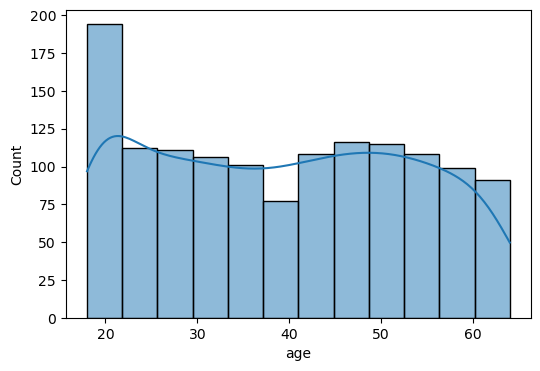

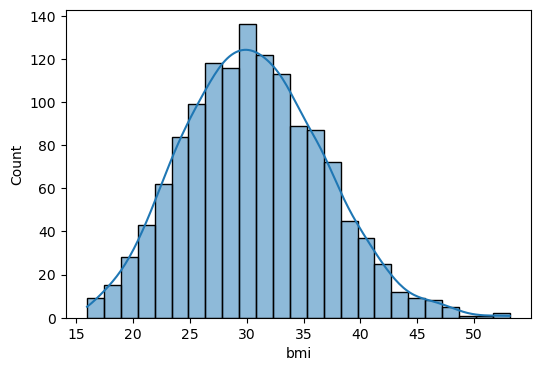

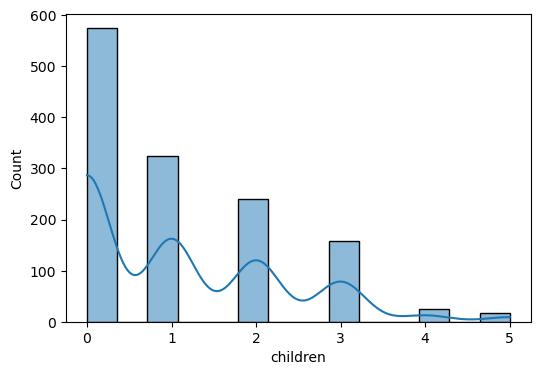

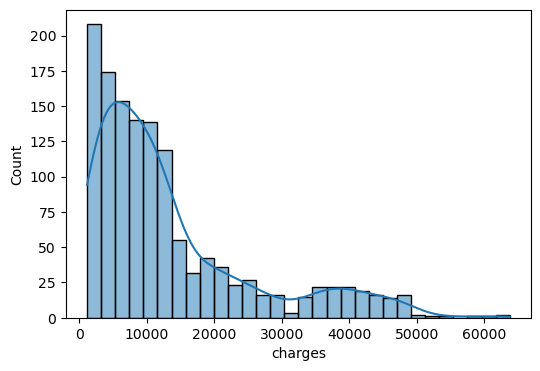

In [261]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize = (6, 4))
    sns.histplot(df[col], kde = True)

<Axes: xlabel='children', ylabel='count'>

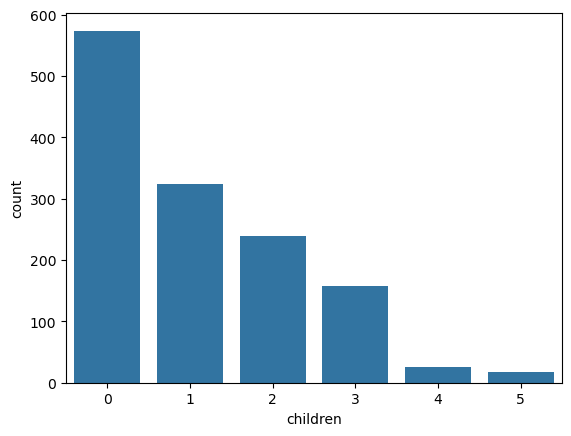

In [262]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

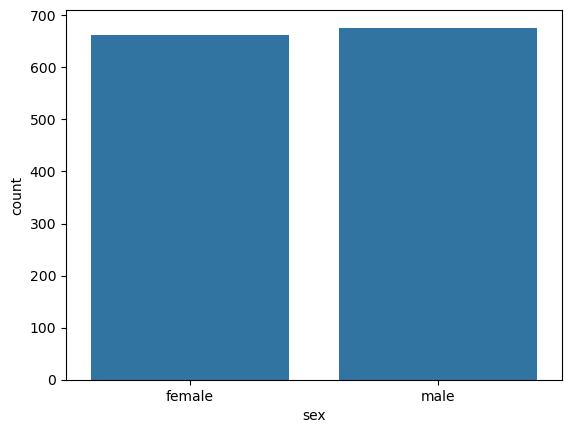

In [311]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

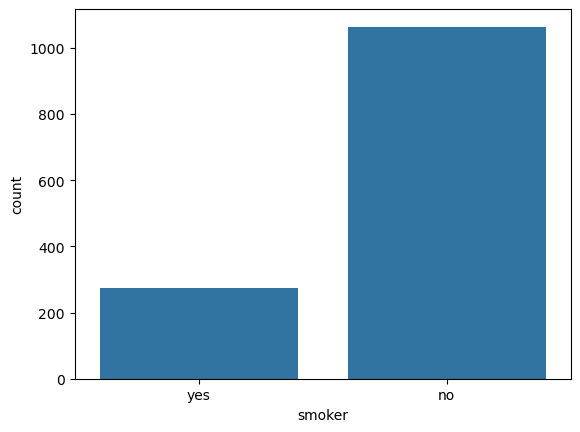

In [264]:
sns.countplot(x = df['smoker'])

<Axes: xlabel='region', ylabel='count'>

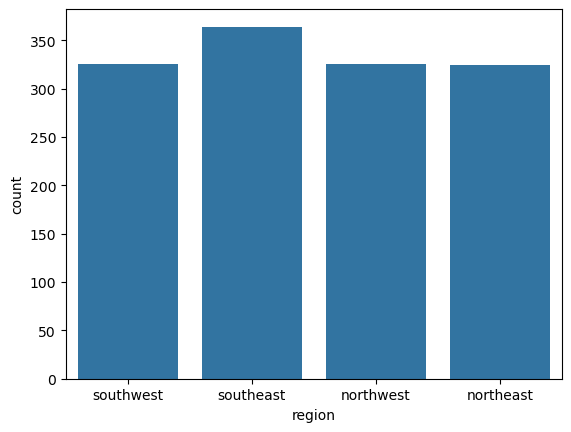

In [265]:
sns.countplot(x = df['region'])

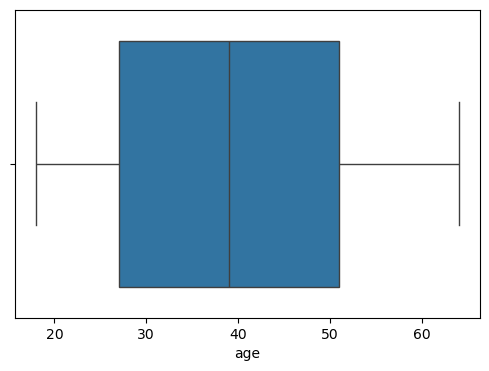

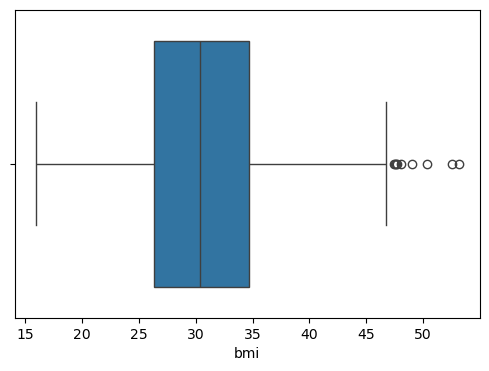

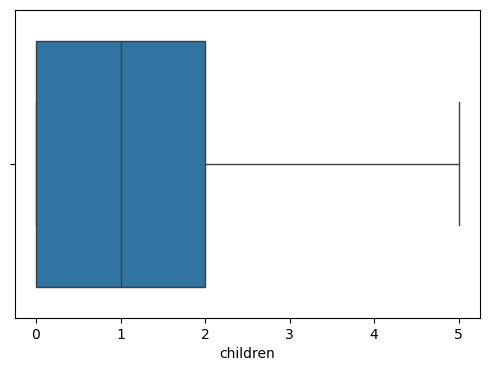

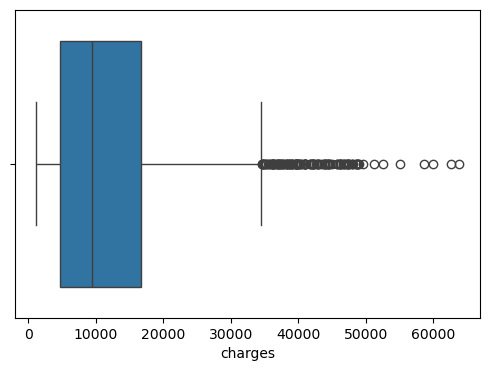

In [266]:
for col in numeric_columns:
    plt.figure(figsize = (6, 4))
    sns.boxplot(x = df[col])

<Axes: >

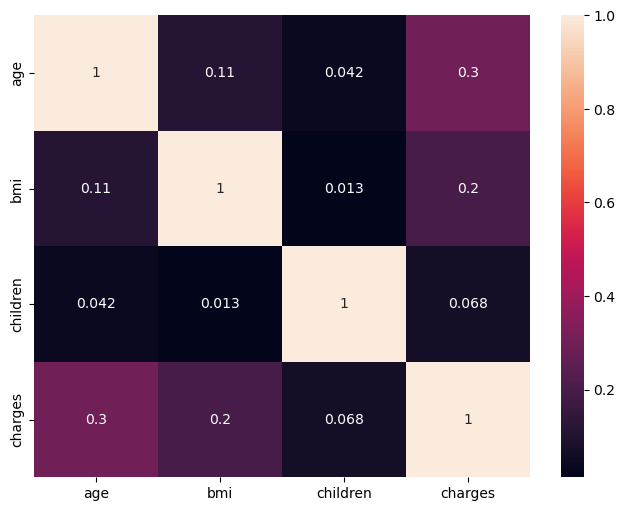

In [267]:
# Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(numeric_only = True), annot = True)

# Data Cleaning and Preprocessing

In [268]:
df_cleaned = df.copy()
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [269]:
df_cleaned.shape

(1338, 7)

In [270]:
df_cleaned.drop_duplicates(inplace = True)
df_cleaned.shape

(1337, 7)

In [271]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [272]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

next step to convert the objects into numeric values

In [273]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

Using label encoding for sex, converting males into 0 and females into 1

In [274]:
df_cleaned['sex'] = df['sex'].map({'male' : 0, 'female': 1})
df_cleaned.head(8)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
5,31,1,25.740,0,no,southeast,3756.62160
6,46,1,33.440,1,no,southeast,8240.58960
7,37,1,27.740,3,no,northwest,7281.50560


In [275]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [276]:
df_cleaned['smoker'] = df['smoker'].map({'no' : 0, 'yes': 1})
df_cleaned.head(8)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560


In [277]:
df_cleaned.rename(columns = {'sex' : 'is_female' , 'smoker' : 'is_smoker'}, inplace = True)
df_cleaned.head(8)

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560


In [278]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [279]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ['region'], drop_first = True)

In [280]:
df_cleaned.head(8)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
5,31,1,25.740,0,0,3756.62160,False,True,False
6,46,1,33.440,1,0,8240.58960,False,True,False
7,37,1,27.740,3,0,7281.50560,True,False,False


In [281]:
df_cleaned.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

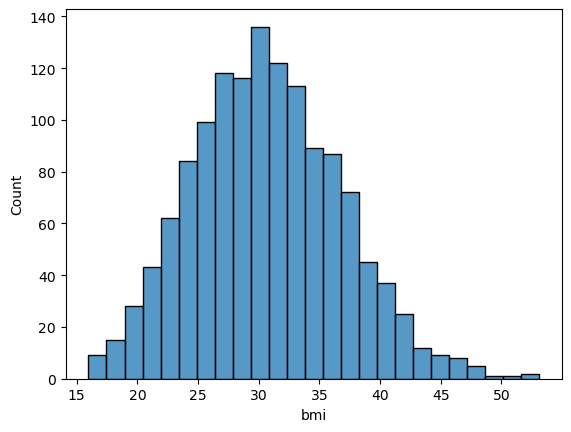

In [282]:
sns.histplot(df['bmi'])

In [283]:
df_cleaned['bmi_category'] = pd.cut(df['bmi'], bins = [0, 18.5, 24.9, 29.9, float('inf')], labels = ['Underweight', 'Normal', 'Overweight', 'Obese'])

df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,Obese
2,28,0,33.000,3,0,4449.46200,False,True,False,Obese
3,33,0,22.705,0,0,21984.47061,True,False,False,Normal
4,32,0,28.880,0,0,3866.85520,True,False,False,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False,Obese
1334,18,1,31.920,0,0,2205.98080,False,False,False,Obese
1335,18,1,36.850,0,0,1629.83350,False,True,False,Obese
1336,21,1,25.800,0,0,2007.94500,False,False,True,Overweight


In [284]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ['bmi_category'], drop_first = True)

In [285]:
df_cleaned = df_cleaned.astype(int)

In [286]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


# Feature Scaling

In [287]:
df_cleaned.dtypes

age                        int32
is_female                  int32
bmi                        int32
children                   int32
is_smoker                  int32
charges                    int32
region_northwest           int32
region_southeast           int32
region_southwest           int32
bmi_category_Normal        int32
bmi_category_Overweight    int32
bmi_category_Obese         int32
dtype: object

In [288]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [289]:
from sklearn.preprocessing import StandardScaler

In [290]:
cols = ['bmi' , 'age' , 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [291]:
df_cleaned.head(8)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
5,-0.585661,1,-0.844753,-0.909234,0,3756,0,1,0,0,1,0
6,0.482785,1,0.462463,-0.079442,0,8240,0,1,0,0,0,1
7,-0.158282,1,-0.517949,1.580143,0,7281,1,0,0,0,1,0


### Getting pearson correlation calculation to measure strength and direction of linear relationships between two variables

In [292]:
from scipy.stats import pearsonr

selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations = {feature: pearsonr(df_cleaned[feature], df_cleaned['charges'] )[0] for feature in selected_features}

correlations_df = pd.DataFrame(list(correlations.items()), columns = ['Feature', 'Pearson_Correlation'])
correlations_df.sort_values(by = 'Pearson_Correlation', ascending = False)

,Feature,Pearson_Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.197660
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046
8,bmi_category_Normal,-0.105656


Now, for comparing the features between two terminologies (categorical variables), we will use chi square test

In [293]:
categorical_features = [
    'is_female', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest'
    , 'bmi_category_Normal', 'bmi_category_Obese', 'bmi_category_Overweight'
]

In [294]:
from scipy.stats import chi2_contingency

In [295]:
alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df['charges'], q=4, labels=False)
chi2_results = {}

for col in categorical_features:
    contigency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_value, _, _ = chi2_contingency(contigency)
    decision = 'Reject Null Hypothesis (Keep changes)' if p_value < alpha else 'Accept Null Hypothesis'
    chi2_results[col] = {
        'chi2_statistics' : chi2_stat,
        'p_value' : p_value,
        'Decision' : decision
    }

In [296]:
chi_df = pd.DataFrame(chi2_results).T
chi_df = chi_df.sort_values(by = 'p_value')
chi_df

,chi2_statistics,p_value,Decision
is_smoker,853.288819,0.0,Reject Null Hypothesis (Keep changes)
region_southeast,15.2523,0.001613,Reject Null Hypothesis (Keep changes)
is_female,9.467253,0.023682,Reject Null Hypothesis (Keep changes)
bmi_category_Obese,7.78799,0.050603,Accept Null Hypothesis
region_southwest,5.517988,0.137567,Accept Null Hypothesis
bmi_category_Overweight,4.625295,0.201383,Accept Null Hypothesis
bmi_category_Normal,4.225326,0.238138,Accept Null Hypothesis
region_northwest,1.194988,0.754207,Accept Null Hypothesis


In [297]:
final_df = df_cleaned[['age', 'bmi', 'children', 'is_smoker', 'charges']]

In [298]:
final_df

,age,bmi,children,is_smoker,charges
0,-1.440418,-0.517949,-0.909234,1,16884
1,-1.511647,0.462463,-0.079442,0,1725
2,-0.799350,0.462463,1.580143,0,4449
3,-0.443201,-1.334960,-0.909234,0,21984
4,-0.514431,-0.354547,-0.909234,0,3866
...,...,...,...,...,...
1333,0.767704,-0.027743,1.580143,0,10600
1334,-1.511647,0.135659,-0.909234,0,2205
1335,-1.511647,0.952670,-0.909234,0,1629
1336,-1.297958,-0.844753,-0.909234,0,2007


## Linear Regression Model using scikit-learn

#### Splitting into train data and test data (80/20)

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
x = final_df.drop('charges', axis = 1)
y = final_df['charges']

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Using linear regression

In [302]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()


LinearRegression()

In [ ]:
y_train_log = np.log1p(y_train)  # log(1 + y)
model.fit(x_train, y_train_log)

y_pred_log = model.predict(x_test)
y_pred = np.expm1(y_pred_log)  # inverse transform


In [305]:
from sklearn.metrics import r2_score

In [306]:
r2 = r2_score(y_test, y_pred)
r2

0.8046539065586675

In [307]:
n = x_test.shape[0]
P = x_test.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - P - 1))
adjusted_r2

0.8016828633124116

In [308]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [310]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
